In [28]:
from IPython.core.display import display, HTML

display(HTML("<style>#notebook-container {width: 90% !important; }</style>"))
# 마크다운 폰트 
display(HTML("<style>.rendered_html{font-family: 'D2Coding'; font-size: 16pt; line-height: 140%;}</style>"))
# DataFrame 테이블 폰트 
display(HTML("<style>.rendered_html table{font-family: 'D2Coding'; font-size: 16pt; line-height: 140%;}</style>"))
# 출력창 폰트
display(HTML("<style>pre{font-family: 'D2Coding', font-size: 16pt;}.rendered_html>ul>li{margin: 10px}</style>"))
display(HTML("<style>div.output_area>pre, div.output_subarea>pre{font-size: 16pt; !important; line-height: 140%;}</style>"))
# 코드셀 폰트 
display(HTML("<style> .CodeMirror pre {font-family: 'D2Coding'; font-size: 18pt !important; line-height: 140%;}</style>"))

# Linear Model

- OLS(Ordinary Least Square, 최소제곱법 방식으로 해결하기)
    - OLS 풀이 방법은 항상 Global Optimization 존재함

- GD(Gradient Descent) 경사하강법 방식으로 해결하기
    - Weight를 바꿔가면서 실험하는 방법

In [29]:
import numpy as np

# 이상치 미존재
x1 = np.array([10, 9, 3, 2])
y1 = np.array([90, 80, 50, 30])

# 이상치 존재
x2 = np.array([10, 9, 3, 2, 11])
y2 = np.array([90, 80, 50, 30,40])

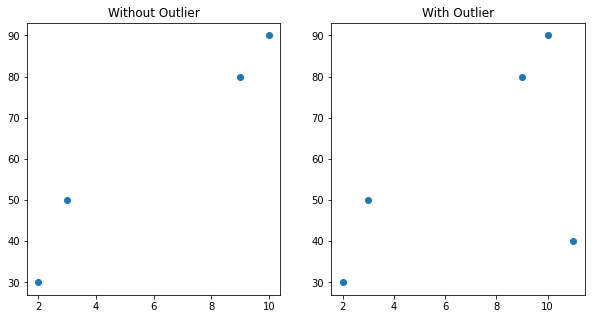

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y1)
plt.title('Without Outlier')

plt.subplot(1, 2, 2)
plt.scatter(x2, y2)
plt.title('With Outlier')
plt.show()

In [31]:
def OLS(x, y):
    w = np.sum((x-x.mean()) * (y-y.mean())) / np.sum((x-x.mean())**2)
    b = y.mean() - w * x.mean()
    return w, b

In [32]:
w1, b1 = OLS(x1, y1)
# 계수, 절편
w1, b1

(6.6, 22.900000000000006)

In [33]:
w2, b2 = OLS(x2, y2)
# 계수, 절편
w2, b2

(3.4285714285714284, 34.0)

In [34]:
# 실제 데이터에 계수를 곱하고 절편을 더해서 예측값을 만든다. 
x1_pred = x1 * w1 + b1
x2_pred = x2 * w2 + b2

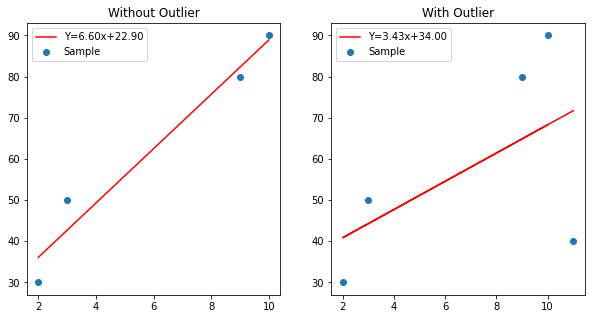

In [35]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(x1, y1, label='Sample')
plt.plot(x1, x1_pred, c='red', label=f'Y={w1:.2f}x+{b1:.2f}')
plt.legend()
plt.title('Without Outlier')

plt.subplot(1, 2, 2)
plt.scatter(x2, y2, label='Sample')
plt.plot(x2, x2_pred, c='red', label=f'Y={w2:.2f}x+{b2:.2f}')
plt.title('With Outlier')
plt.legend()
plt.show()

- 앞에서 구한 OLS 방법이 실제 Scikit-learn과 동일한지 확인
    - `from sklearn.linear_model import LinearRegression`

In [36]:
from sklearn.linear_model import LinearRegression

# 모델을 생성하고, fit을 통해 훈련 시킴
model1 = LinearRegression().fit(x1.reshape(-1, 1), y1)
# Scikit-learn의 회귀분석 결과 
print('scikit-learn :', model1.coef_, model1.intercept_)
# 직접 구현한 OLS 결과 
print('직접 구현한 OLS : ', w1, b1)

scikit-learn : [6.6] 22.899999999999977
직접 구현한 OLS :  6.6 22.900000000000006


In [37]:
model2 = LinearRegression().fit(x2.reshape(-1, 1), y2)
model2.coef_, model2.intercept_

(array([3.42857143]), 33.99999999999999)

In [38]:
w2, b2

(3.4285714285714284, 34.0)

## 경사 하강법 실습

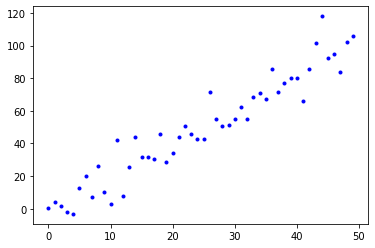

In [39]:
X = np.arange(50)

# np.random.randn(50) -> 50개의 난수를 추가한다. 
Y = (2 * X) + 10 * np.random.randn(50)
plt.plot(X, Y, 'b.')

- 경사 하강법 Plot

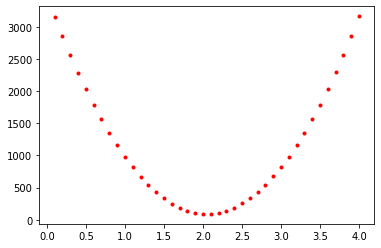

In [40]:
# w_range 는 시각화를 위해 인위적으로 부여하는 숫자.
# SGD (w값을 실제로 난수로 초기화)
w_range = np.arange(0.1, 4.1, 0.1)

costs = []
# w를 하나씩 반복해 가면서 최적점을 찾음 
for w in w_range:
    # 실습의 편의성을 위해 b를 생략
    h = w * X 
    # 일종의 비용 함수의 모습
    cost = 1 / 50 * np.sum( (h-Y) ** 2)
    costs.append(cost)

# weight 변화에 따른 비용함수 그림
plt.plot(w_range, costs, 'r.')

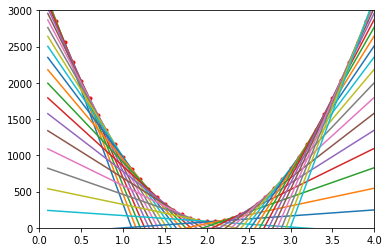

In [41]:
plt.plot(w_range, costs, 'r.')

# weight와 cost를 반복해가면서 gradient를 찾음 
for w, cost in zip(w_range, costs):
    h = w * X
    # gradient를 구하는 방법
    gradient = 2 / 50 * np.sum( (h-Y) * X)
    plt.plot(w_range, gradient*(w_range-w)+cost)
    plt.axis([0, 4, 0, 3000])
plt.show() 

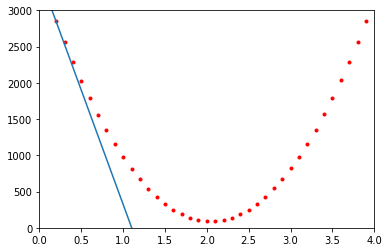

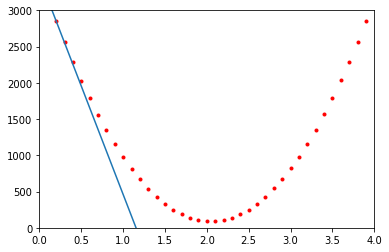

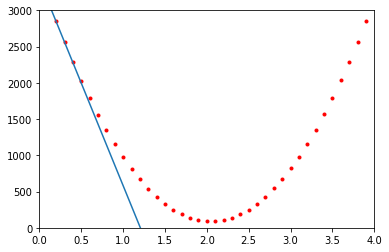

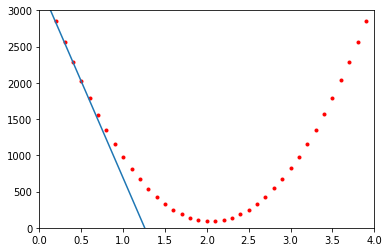

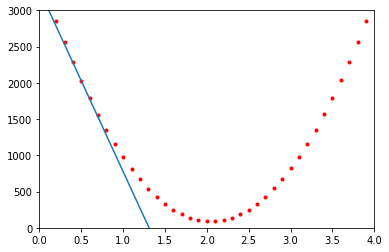

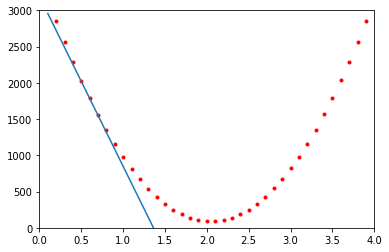

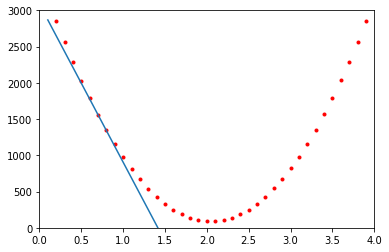

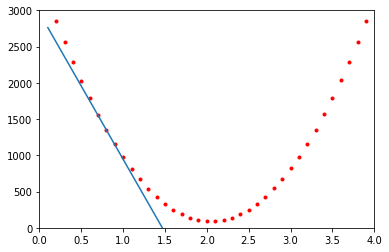

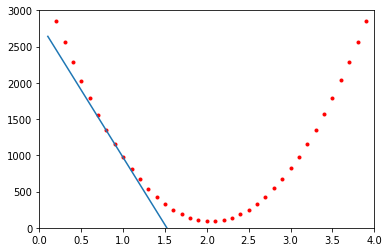

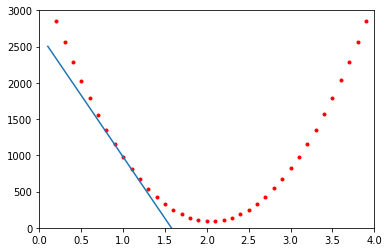

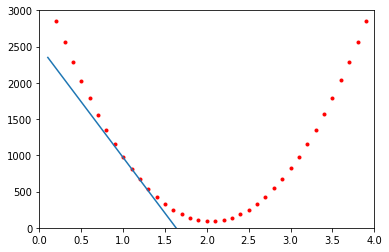

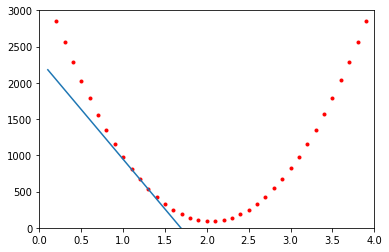

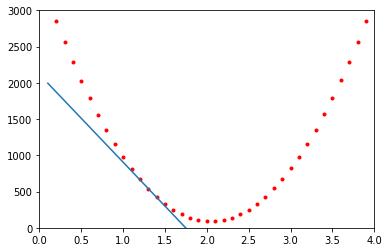

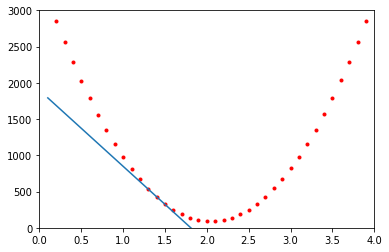

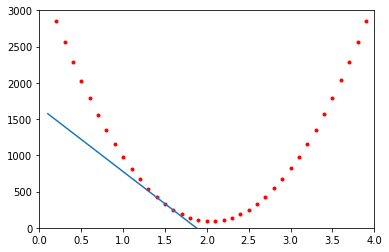

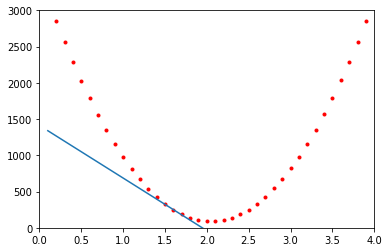

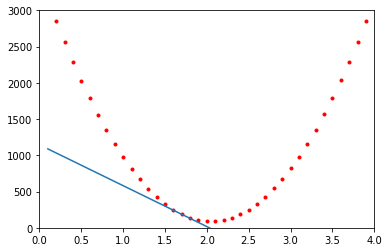

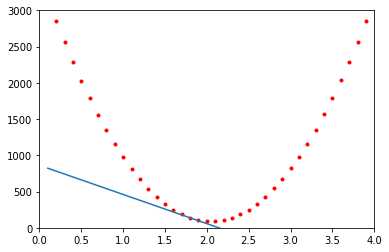

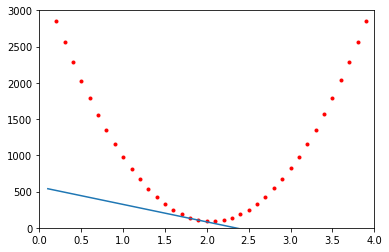

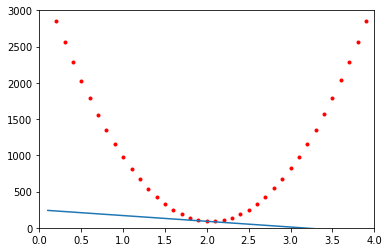

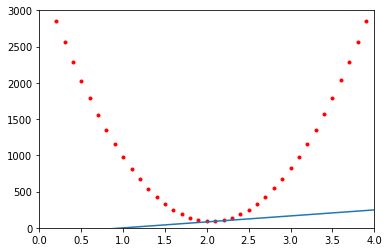

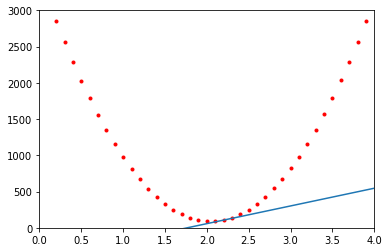

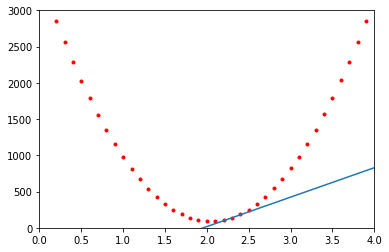

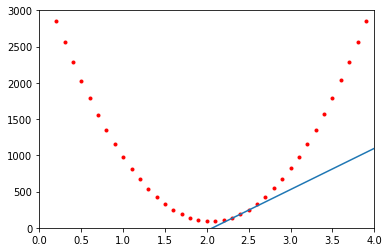

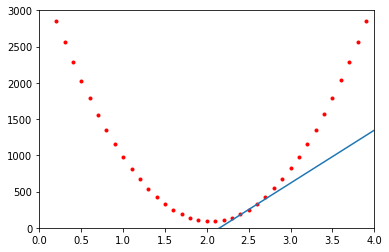

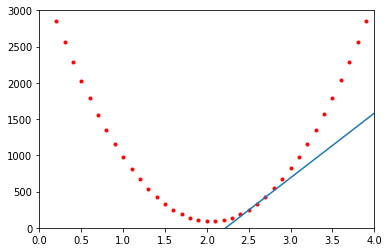

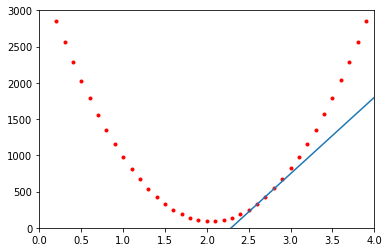

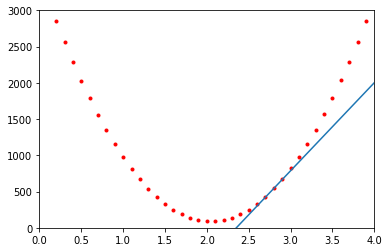

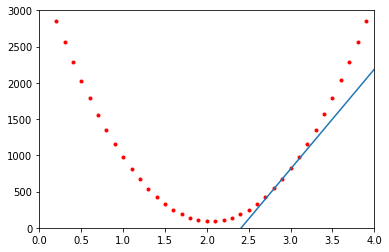

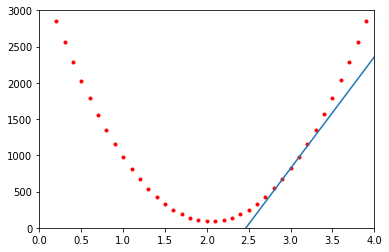

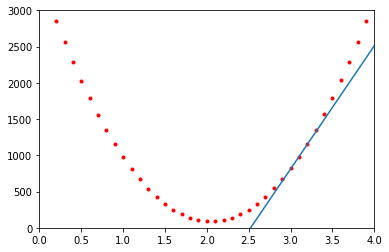

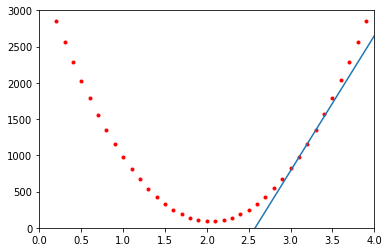

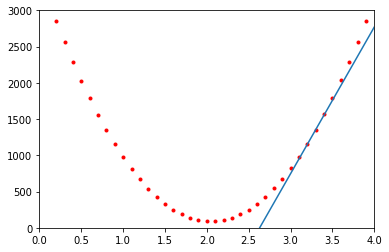

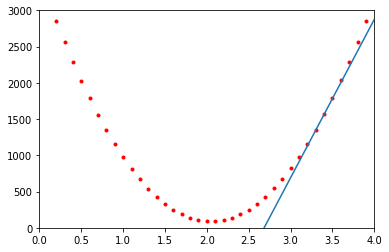

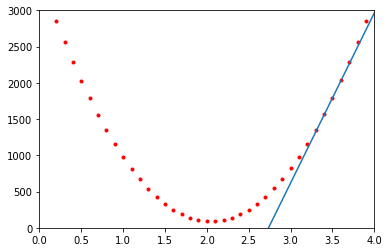

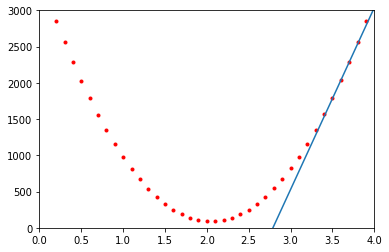

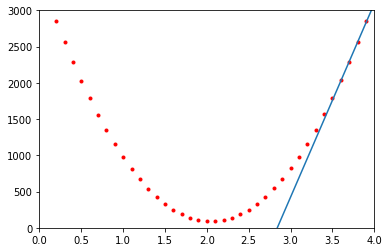

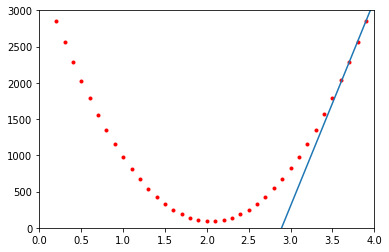

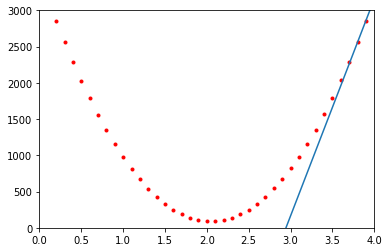

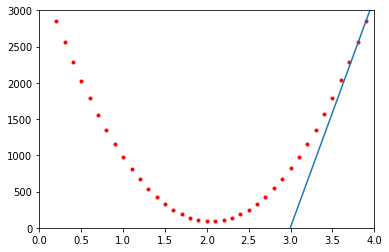

In [42]:
for w, cost in zip(w_range, costs):
    plt.plot(w_range, costs, 'r.')
    h = w * X
    gradient = 2 / 50 * np.sum( (h-Y) * X)
    plt.plot(w_range, gradient*(w_range-w)+cost)
    plt.axis([0, 4, 0, 3000])
    plt.show() 

In [43]:
# Sckit-learn SGDRegressor
from sklearn.linear_model import SGDRegressor
# Convergence 경고시 -> max_iter 증가
# 경사하강법 초기는 w, b 랜덤하게 초기화 진행 -> random_state 값 지정 필요 (재현성 위해)
model = SGDRegressor(max_iter=10000, random_state=0).fit(x1.reshape(-1, 1), y1)
model.coef_, model.intercept_

(array([6.71955813]), array([21.86656835]))

-----

# Linear Regression 실습

- Polynomial Features 생성 후 Fitting 
- Ridge, Lasso 모델 실습

In [44]:
!pip install mySUNI

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [45]:
from mySUNI import cds

In [46]:
cds.list_data()

,name,info,filename
0,서울시자전거,서울시 따릉이 자전거 대여량 정보,[seoul_bicycle.csv]
1,서울시대중교통,"서울시 대중교통(지하철, 버스) 이용객 정보",[seoul_transportation.xlsx]
2,서울시주민등록인구,서울시 주민등록인구 정보,[seoul_population.csv]
3,유가정보,2019년 서울시 유가 정보,"[gas_first_2019.csv, gas_second_2019.csv]"
4,PandasFileIO,Pandas File I/O 연습 문제용 데이터셋,"[mySUNI.xlsx, mySUNI_1.csv, mySUNI_2.csv, mySU..."
5,CCTV데이터분석,mySUNI WorkShop - CCTV 데이터 분석,"[01. CCTV_in_Seoul.csv, 01. population_in_Seou..."
6,국민연금데이터분석,mySUNI WorkShop - 국민연금 데이터 분석,[national_pension.csv]
7,민간아파트가격동향분석,mySUNI WorkShop - 민간 아파트 가격 동향 분석,[seoul_house_price.csv]
8,실거래가분석,mySUNI WorkShop - 2020년 아파트 실거래가 분석,"[2020-seoul-apt-price.csv, loc_code.xlsx]"
9,유가가격분석,mySUNI WorkShop - 2020년 유가 가격 분석,"[gas_first_2019.csv, gas_second_2019.csv]"


In [47]:
cds.download_data('보스턴집값')

파일 다운로드 완료

데이터셋: 보스턴집값
파일경로: data/boston.csv



# Task - 데이터 분석 진행

In [48]:
# data 폴더에 있는 boston.csv 데이터 읽기 
import pandas as pd 

df = pd.read_csv('data/boston.csv')

# 1) Data Loading

In [49]:
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston() # -> Bunch : key-value
df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
df['PRICE'] = boston['target']
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 2) Data Preprocessing

- `isna().sum()`

- `info()`

- `describe()`

In [50]:
# 데이터 결측치를 확인
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [51]:
# 데이터 변수 유형 확인 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [52]:
# 데이터 통계량 확인 
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [53]:
# 불필요한 컬럼(Feature) 제거 
df.describe().T['std'] == 0.0
#df.drop(['Unnamed: 0'], axis = 1, inplace = True)

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
Name: std, dtype: bool

# 2-1) Feature Engineering + EDA(Explortatory Data Analysis)

- 이상치 조회 방법 : BoxPlot
    `dataframe.plot()`
- 데이터 상관성 확인 (Correlations)

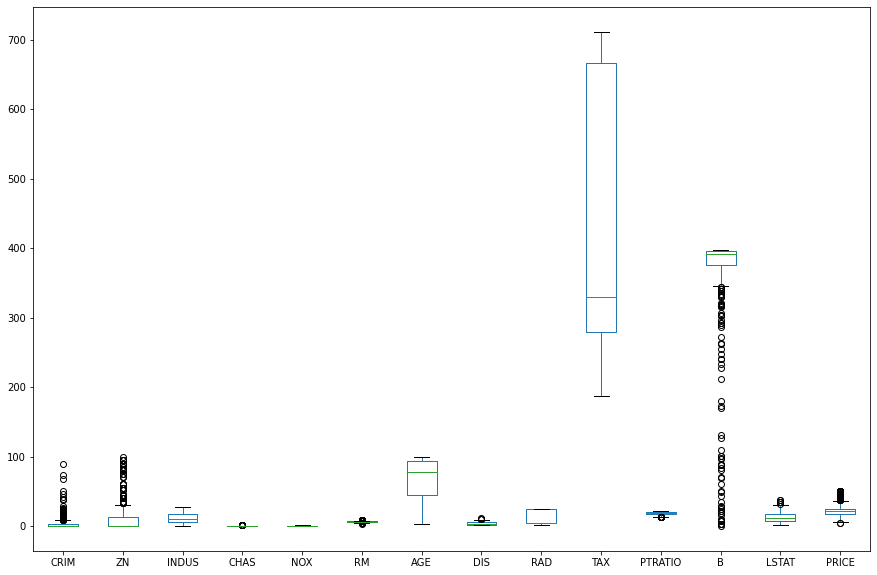

In [54]:
df.plot(kind='box', figsize=(15, 10))

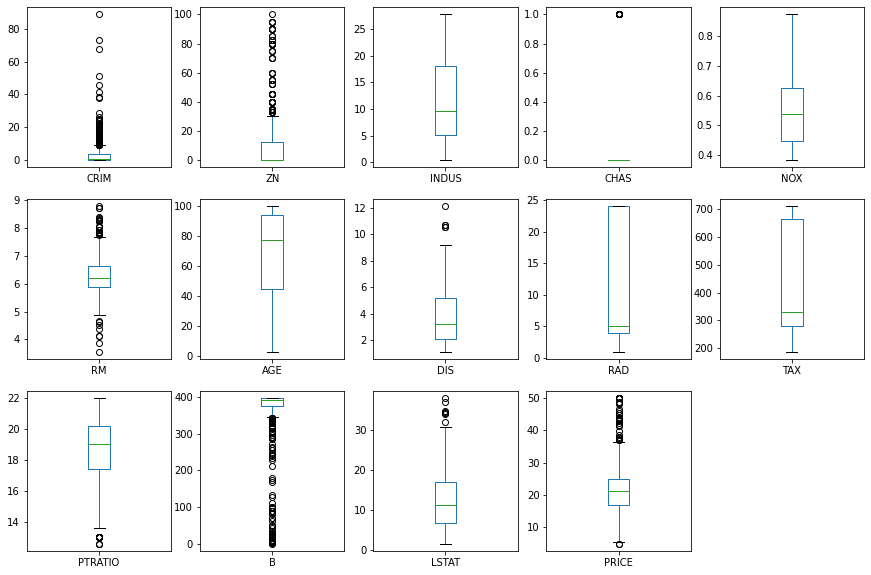

In [55]:
# 컬럼별로 box-plot
df.plot(kind='box', figsize=(15, 10), subplots=True, layout=(3, 5))
plt.show()

In [56]:
import seaborn as sns

<Figure size 1080x1080 with 0 Axes>

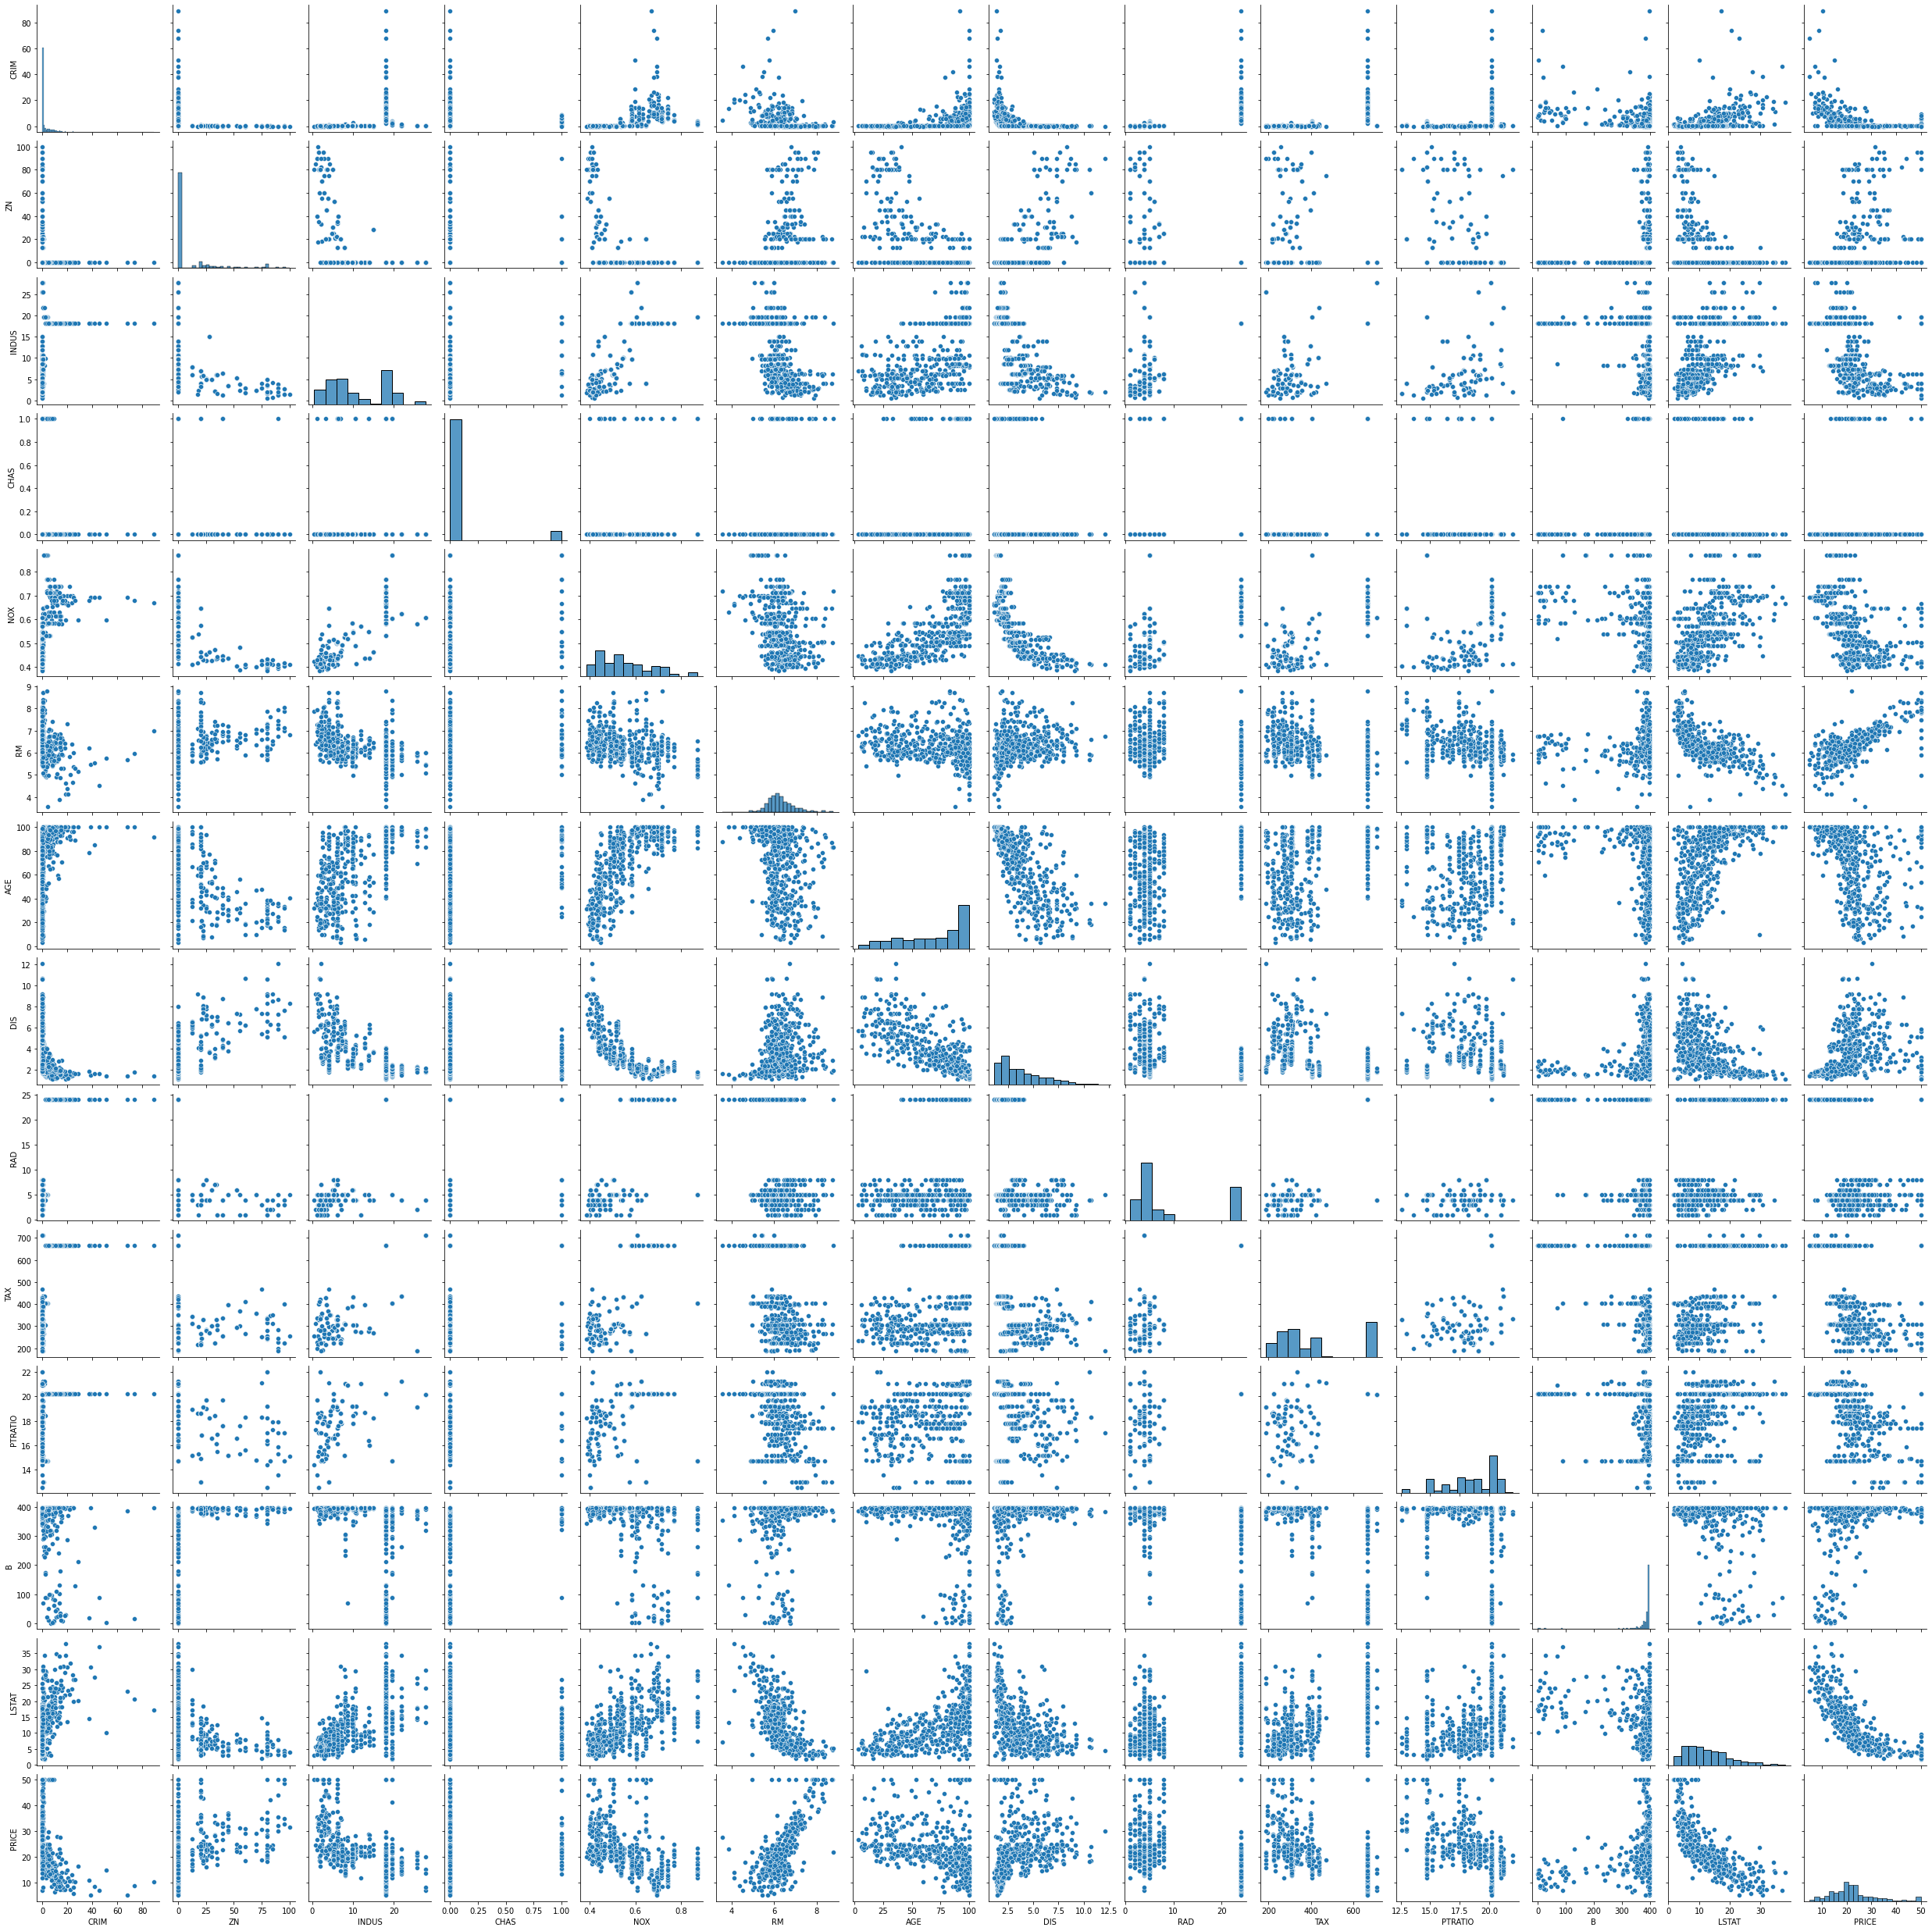

In [57]:
plt.figure(figsize=(15, 15))
sns.pairplot(df) # Feature 간 관계, 분포 확인을 위해 사용 (데이터 많을 시 많이 걸림)
plt.show()

# 선형성 있는지 확인하기 위해서는 Linear Regression을 통해 잔차 분석을 진행하면 됨 -> 추가 설명*
# pairplot -> 대각선 값은 데이터의 분포를 확인함 

# 왼쪽으로 쏠린 데이터 Log, 오른쪽으로 쏠린 데이터는 Sqrt
# 한쪽으로 극단적으로 분리되거나 간격 일정하면 범주형 가능성 높음 

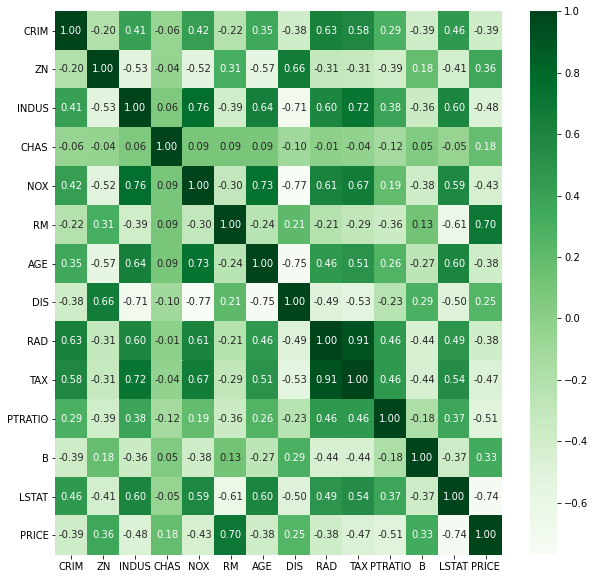

In [58]:
# 다중공선성 확인 및 변수간 상관관계 분석 -> VIF 로 해결 가능 
# 다중공선성 발생시 계수값 신뢰 불가 -> 오컴즈 레이저 
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Greens')
plt.show()

# 2-2) Data Splitting

- 데이터 분할 (Trian/Test)

In [59]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [111]:
from sklearn.model_selection import train_test_split
x = df.loc[:, 'CRIM':'LSTAT']#loc['행', '열']
y = df.loc[:, 'PRICE']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [112]:
from sklearn.linear_model import LinearRegression

# 최소자승법 모델 
model = LinearRegression().fit(x_train, y_train)

# Model 성능 표현 
model.score(x_train, y_train), model.score(x_test, y_test)

(0.7730135569264233, 0.5892223849182525)

In [113]:
from sklearn.linear_model import SGDRegressor

# 확률적 경사하강법 모델 
model = SGDRegressor(max_iter=10000, random_state=0).fit(x_train, y_train)

# Model 성능 표현 -> 성능 엄청 안좋음
model.score(x_train, y_train), model.score(x_test, y_test)

# Gradient 모델을 사용할 경우 Data간 스케일링 매우 중요 -> 그림으로 표현 
# OLS는 스케일링 괜찮음

(-4.4031875240473084e+26, -4.9152743704190855e+26)

### 2-3) [task] SGDRegressor 모델의 성능 업그레이드 진행

In [114]:
# 데이터 스케일링 변환 
from sklearn.preprocessing import MinMaxScaler

# 데이터 재분할 
x_new = MinMaxScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

# 확률적 경사하강법 모델 사용 
model = SGDRegressor(max_iter=10000, random_state=0).fit(x_train, y_train)

# Model 성능 표현 평가
model.score(x_train, y_train), model.score(x_test, y_test)

(0.758934369351793, 0.5607894931217703)

# Polynomial Features 실습

- 다항 변환 (Polynomial Kernel) 이란 개념도 존재 

- X1, X2 -> X1^2, X2^2, X1X2 (교호작용) 항 추가

- Overfitting - Underfitting 

- Bias/Variance Trade-off

In [64]:
import numpy as np
# 데이터 변환 (preprocessing) 과정에 존재 
from sklearn.preprocessing import PolynomialFeatures

# 차수에 따라 증가하는 Feature 갯수 많아짐 
P = PolynomialFeatures(degree=2)
# 1~6 까지 데이터 만듦, 2차원 데이터로 
x = np.arange(5).reshape(-1, 1)

pd.DataFrame(P.fit_transform(x), columns=P.get_feature_names())

,1,x0,x0^2
0,1.0,0.0,0.0
1,1.0,1.0,1.0
2,1.0,2.0,4.0
3,1.0,3.0,9.0
4,1.0,4.0,16.0


In [65]:
from sklearn.preprocessing import PolynomialFeatures
P = PolynomialFeatures(degree=2)
x = np.arange(10).reshape(-1, 2)
pd.DataFrame(P.fit_transform(x), columns=P.get_feature_names())

,1,x0,x1,x0^2,x0 x1,x1^2
0,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,2.0,3.0,4.0,6.0,9.0
2,1.0,4.0,5.0,16.0,20.0,25.0
3,1.0,6.0,7.0,36.0,42.0,49.0
4,1.0,8.0,9.0,64.0,72.0,81.0


In [66]:
P = PolynomialFeatures(degree=2, include_bias=False)
x = np.arange(10).reshape(-1, 2)
pd.DataFrame(P.fit_transform(x), columns=P.get_feature_names())

,x0,x1,x0^2,x0 x1,x1^2
0,0.0,1.0,0.0,0.0,1.0
1,2.0,3.0,4.0,6.0,9.0
2,4.0,5.0,16.0,20.0,25.0
3,6.0,7.0,36.0,42.0,49.0
4,8.0,9.0,64.0,72.0,81.0


In [67]:
# PolynomialFeatures 라는 변환기를 하나 생성하면, 해당 변환기로 데이터 변환이 가능 
P = PolynomialFeatures(degree=2, include_bias=False) #-> 2차항으로 변환하는 변환기, 절편은 없음 

# 가지고 있는 데이터를 Polynomial 형태로 변환 
x_poly = P.fit_transform(df.loc[:, 'CRIM':'LSTAT'])

# 변환된 데이터를 분할 
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state=0)

# 데이터 갯수가 많아짐을 확인
df.loc[:, 'CRIM':'LSTAT'].shape, x_poly.shape

((506, 13), (506, 104))

In [68]:
# 변환된 데이터를 Liner 모델에 훈련시킴 -> 여전이 Linear Regression 이다 
model = LinearRegression().fit(x_train, y_train)
# Train > Test 성능 차이가 10% 이상 차이이다 -> Overfitting (사람마다 평가하는 기준이 다름)
# 5% 사이면 튜닝 필요
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9520519609032728, 0.6074721959639562)

### 차수(degree) 증가에 따라 정확도가 얼마나 변화하는지?

- 모델 복잡도와 Train/Test 값 변환

- Overfitting/Underfitting - Bias variance trade-off 에 대한 PPT 자료 참조

In [69]:
# 차수 3 
P = PolynomialFeatures(degree=3, include_bias=False)

x_poly = P.fit_transform(df.loc[:, 'CRIM':'LSTAT'])

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state=0)

model = LinearRegression().fit(x_train, y_train)

model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, -9443.834293423024)

In [70]:
# 차수 5
P = PolynomialFeatures(degree=5, include_bias=False)

x_poly = P.fit_transform(df.loc[:, 'CRIM':'LSTAT'])

x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state=0)

model = LinearRegression().fit(x_train, y_train)

model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, -135.30506304542436)

# Regularization 모델 실습

- L2 규제 : weight의 크기를 제약
    - `from sklearn.linear_model import Ridge`
- L1 규제 : weight를 선택 
    - `from sklearn.linear_model import Lasso`
- L1 + L2 규제 (선택과 크기 제약을 동시에)
    - `from sklearn.linear_model import ElasticNet`

In [117]:
P = PolynomialFeatures(degree=3, include_bias=False)
x_poly = P.fit_transform(df.loc[:, 'CRIM':'LSTAT'])
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state=0)

from sklearn.linear_model import Ridge

# 극단적인 alpha 값 부여
model = Ridge(alpha=1000000000).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9379888013471791, 0.7343396019955771)

In [118]:
model.coef_

array([ 5.21457851e-09, -1.28206270e-08,  1.07412245e-08, -2.38618813e-09,
       -1.68796069e-11,  9.77081205e-09,  1.78454505e-08, -2.73715681e-09,
        4.35952395e-09,  6.52679753e-08, -1.24424411e-08, -1.10073798e-07,
       -3.21773321e-08,  2.79429679e-08,  3.35015620e-08,  1.39802503e-07,
        2.92978242e-08, -4.09864991e-09,  3.29873827e-08,  7.89928985e-08,
        2.72893086e-08, -4.42005802e-08,  1.42883961e-06,  3.91651424e-08,
        9.82123262e-07, -8.91848620e-08, -7.69635643e-07, -2.22140140e-08,
        2.22961593e-08, -1.19082841e-08,  3.98819509e-08,  5.79112479e-07,
       -2.83325486e-08, -4.21465685e-08, -2.47806474e-06, -1.08723941e-07,
       -2.33720337e-06, -1.65306870e-07,  3.67458890e-07, -6.86601748e-08,
        8.12503928e-09,  2.16848861e-07,  7.19009754e-07,  1.92824759e-08,
        6.92141114e-08,  4.32886301e-06, -1.10698976e-07, -1.89237684e-07,
        1.53340283e-07, -2.38618813e-09, -3.77021498e-09, -3.65813185e-08,
       -1.10527855e-07,  

In [119]:
# 계수 분석
coef = pd.Series(model.coef_, P.get_feature_names()) 
coef

x0           5.214579e-09
x1          -1.282063e-08
x2           1.074122e-08
x3          -2.386188e-09
x4          -1.687961e-11
                 ...     
x10 x12^2   -1.739523e-05
x11^3       -1.201818e-07
x11^2 x12    1.964687e-06
x11 x12^2   -1.045256e-05
x12^3       -6.483883e-05
Length: 559, dtype: float64

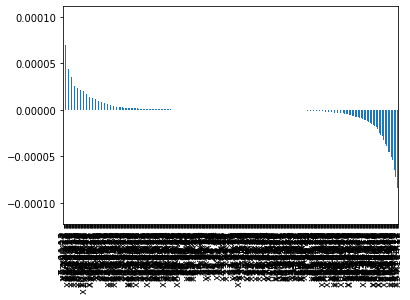

In [120]:
# 오래걸림
coef[coef!=0].sort_values(ascending=False).plot(kind='bar')

### 3차 Polynomial Features -> MinMaxScaling -> Linear/ L2-Regularization(Ridge) 모델링

In [121]:
from sklearn.preprocessing import MinMaxScaler
P = PolynomialFeatures(degree=3, include_bias=False)
x_scaled = MinMaxScaler().fit_transform(df.loc[:, 'CRIM':'LSTAT'])
y = df.loc[:, 'PRICE']
x_poly = P.fit_transform(x_scaled)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state=0)

In [122]:
# 극단적인 OverFitting 문제 발생
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, -237.45109423154884)

In [123]:
# L2 규제
from sklearn.linear_model import Ridge
model = Ridge(alpha=1).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9242749146283601, 0.7865342899841107)

In [124]:
ridge01 = Ridge(alpha=0.1).fit(x_train, y_train)
ridge01.score(x_train, y_train), ridge01.score(x_test, y_test)

(0.9537155397034659, 0.7905570432110316)

In [125]:
ridge10 = Ridge(alpha=10).fit(x_train, y_train)
ridge10.score(x_train, y_train), ridge10.score(x_test, y_test)

(0.85555019397812, 0.7230747746713164)

### 데이터 시각화를 통해 L2 규제 효과 확인

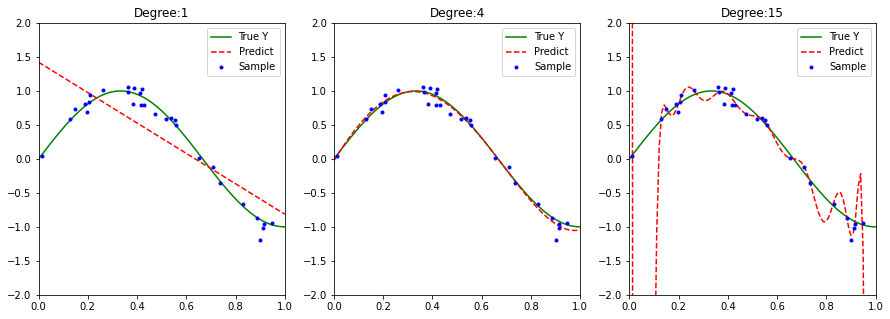

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

def sin(X):
    return np.sin(1.5 * np.pi * X)

m = 30
X = np.sort(np.random.rand(m))
y = sin(X) + np.random.randn(m) * 0.1

degrees = (1, 4, 15)
plt.figure(figsize=(15,5))
for i, degree  in enumerate(degrees):
    polynomial = PolynomialFeatures(degree=degree)
    lr = LinearRegression()
    pipe = Pipeline([('polynomial', polynomial), ('linear_regression', lr)])
    pipe.fit(X.reshape(-1,1), y)
    
    X_test = np.linspace(0,1, 100)
    plt.subplot(1, len(degrees), i+1)
    plt.plot(X_test, sin(X_test), 'g-', label='True Y')
    plt.plot(X_test, pipe.predict(X_test[:, np.newaxis]),'r--',label='Predict')
    plt.plot(X, y, 'b.', label='Sample')
    plt.xlim((0,1)); plt.ylim((-2,2))
    plt.legend()
    plt.title(f"Degree:{degree}")
    
plt.show()

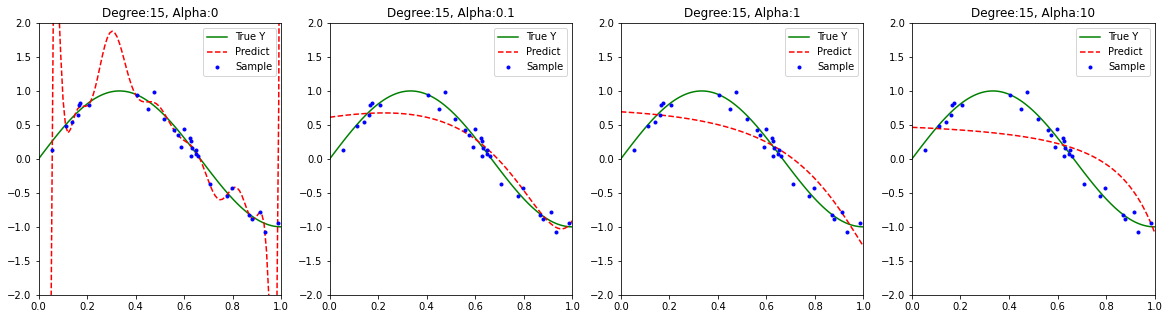

In [80]:
from sklearn.linear_model import Ridge

alphas = (0, 0.1, 1, 10)
plt.figure(figsize=(20, 5))

for i, alpha  in enumerate(alphas):
    polynomial = PolynomialFeatures(degree=15)
    ridge = Ridge(alpha=alpha)
    pipe = Pipeline([('polynomial', polynomial), ('ridge', ridge)])
    pipe.fit(X.reshape(-1,1), y)
    
    X_test = np.linspace(0,1, 100)
    plt.subplot(1, len(alphas), i+1)
    plt.plot(X_test, sin(X_test), 'g-', label='True Y')
    plt.plot(X_test, pipe.predict(X_test[:, np.newaxis]),
             'r--', label='Predict')
    plt.plot(X, y, 'b.', label='Sample')
    plt.xlim((0,1)); plt.ylim((-2,2))
    plt.legend()
    plt.title(f"Degree:15, Alpha:{alpha}")
    
plt.show()

### Ridge 모델의 Alpha 변화시 Coefficients 변화모습 관찰

In [81]:
ridge01 = Ridge(alpha=0.1).fit(boston['data'], boston['target'])
ridge01_coef = pd.Series(ridge01.coef_, index=boston['feature_names'])

ridge1 = Ridge(alpha=1).fit(boston['data'], boston['target'])
ridge1_coef = pd.Series(ridge1.coef_, index=boston['feature_names'])

ridge10 = Ridge(alpha=10).fit(boston['data'], boston['target'])
ridge10_coef = pd.Series(ridge10.coef_, index=boston['feature_names'])

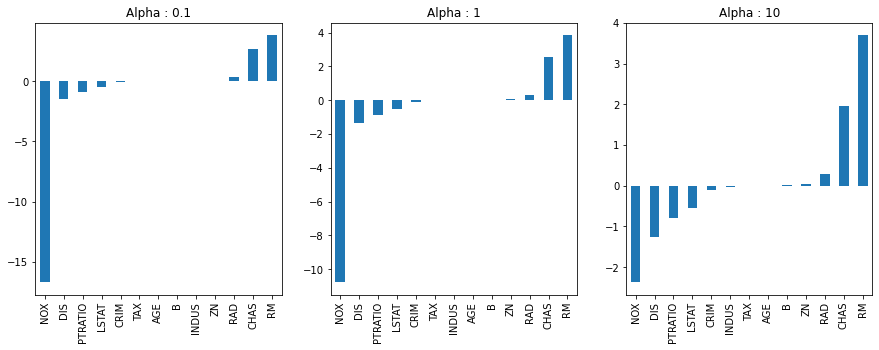

In [82]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
ridge01_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 0.1')
plt.subplot(1, 3, 2)
ridge1_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 1')
plt.subplot(1, 3, 3)
ridge10_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 10')
plt.show()

### 3차 Polynomial Features -> MinMaxScaling -> Linear/ L1-Regularization(Lasso) 모델링

In [127]:
from sklearn.preprocessing import MinMaxScaler
P = PolynomialFeatures(degree=3, include_bias=False)
x_scaled = MinMaxScaler().fit_transform(df.loc[:, 'CRIM':'LSTAT'])
y = df.loc[:, 'PRICE']
x_poly = P.fit_transform(x_scaled)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, random_state=0)

In [128]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, -237.45109423154884)

In [129]:
from sklearn.linear_model import Lasso

# Alpha=1 : 규제 효과 없음
model = Lasso(alpha=1).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.2933995968826698, 0.2124796640448664)

In [130]:
lasso01 = Lasso(alpha=0.1).fit(x_train, y_train)
lasso01.score(x_train, y_train), lasso01.score(x_test, y_test)

(0.783861983129184, 0.6452299604478746)

In [131]:
# 극단적인 규제
lasso10 = Lasso(alpha=10).fit(x_train, y_train)
lasso10.score(x_train, y_train), lasso10.score(x_test, y_test)

(0.0, -0.001119359203955339)

### LASSO 모델의 alpha 변화에 따른 Coefficients 변화 관찰

In [88]:
lasso01 = Lasso(alpha=0.1).fit(boston['data'], boston['target'])
lasso01_coef = pd.Series(lasso01.coef_, index=boston['feature_names'])

lasso1 = Lasso(alpha=1).fit(boston['data'], boston['target'])
lasso1_coef = pd.Series(lasso1.coef_, index=boston['feature_names'])

lasso10 = Lasso(alpha=10).fit(boston['data'], boston['target'])
lasso10_coef = pd.Series(lasso10.coef_, index=boston['feature_names'])

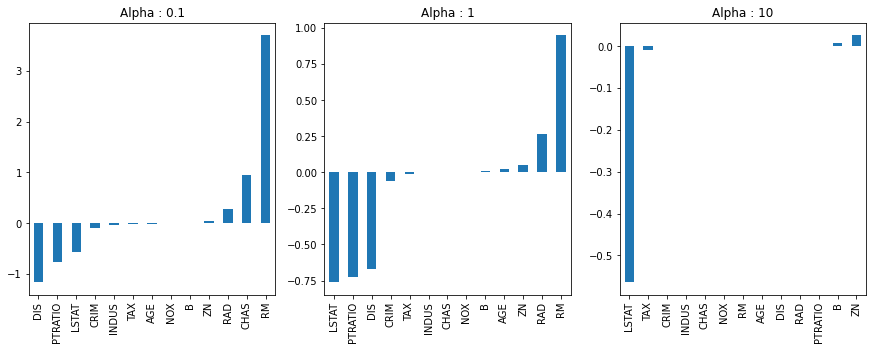

In [89]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
lasso01_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 0.1')
plt.subplot(1, 3, 2)
lasso1_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 1')
plt.subplot(1, 3, 3)
lasso10_coef.sort_values().plot(kind='bar')
plt.title('Alpha : 10')
plt.show()

### ElasticNet (L1 + L2 규제 적용)

In [132]:
from sklearn.linear_model import ElasticNet  # 데이터가 10,000개 이상인 경우 성능이 좋다. 

# L1 ratio 로 규제 반영 비율 결정, default : 0.5
model = ElasticNet().fit(x_train, y_train)
model.score(x_test, y_test)

0.2612090930976937

# WorkShop 실습 

- mySUNI 에서 데이터 1개 선택 

- 전처리, 가공, 변환, 분할, 선형모델링, 평가

------

# Logistic Regression 실습

- Y가 확률일 때 적용
- 데이터를 0과 1 사이의 값으로 표현하기 위해 특정 함수를 취함 (eg, Logistic, Softmax) 

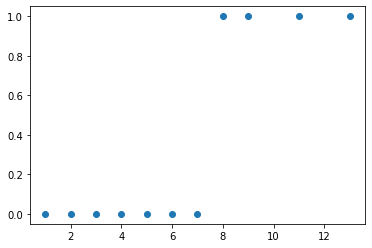

In [134]:
import numpy as np 
import matplotlib.pyplot as plt

x = np.array([1,2,3,4,5,6,7,8,9,11,13]) 
y = np.array([0,0,0,0,0,0,0,1,1,1,1]) 

plt.scatter(x, y)
plt.show()

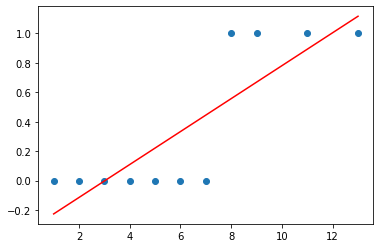

In [135]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x.reshape(-1, 1), y)
plt.scatter(x, y)
plt.plot(x, model.predict(x.reshape(-1, 1)), c='red')
plt.show()

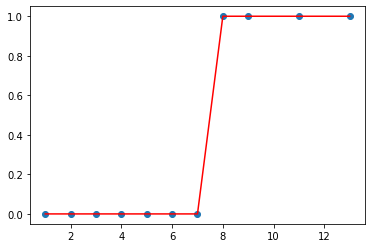

In [136]:
from sklearn.linear_model import LogisticRegression# <- 분류문제 사용
model = LogisticRegression().fit(x.reshape(-1, 1), y)
plt.scatter(x, y)
plt.plot(x, model.predict(x.reshape(-1, 1)), c='red')
plt.show()

In [137]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 위스콘신 대학병원의 유방암 관련 종양 정보 데이터
# 유방암 관련 종양 정보 데이터, 악성 종양(암) 양성 종양(암이 아님) 구분 정보 
# 종양 크기, 질감, 면적, 매끄러운 정보 등 31개 Feature로 구성
cancer = load_breast_cancer()

# 'stratify' 활용에 주의!
x_train, x_test, y_train, y_test = train_test_split(cancer['data'],
                                                    cancer['target'],
                                                    stratify=cancer['target'],
                                                    random_state=0)
# y값을 보고 어떤 문제로 풀어야 하는지 확인해야 함
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

### stratify 효과 확인

In [95]:
pd.value_counts(y_train, normalize=True)

1    0.626761
0    0.373239
dtype: float64

In [96]:
pd.value_counts(y_test, normalize=True)

1    0.629371
0    0.370629
dtype: float64

In [97]:
model = LogisticRegression(max_iter=10000).fit(x_train, y_train) # <- max_iter -> SGD를 쓴다.
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9671361502347418, 0.9370629370629371)

In [98]:
# 예측값 도출 
model.predict(x_test)[:5]

array([1, 0, 0, 1, 0])

In [99]:
# 예측 확률 -> 범주별 확률
model.predict_proba(x_test)[:5]

array([[1.31015720e-02, 9.86898428e-01],
       [9.99982123e-01, 1.78770916e-05],
       [9.99994224e-01, 5.77618955e-06],
       [3.40659069e-04, 9.99659341e-01],
       [9.99550162e-01, 4.49837680e-04]])

In [100]:
# 회귀식의 계산 결과 -> Sigmoid 의 변수로 들어감 -> 해당 값이 통과해서 나온 것들이 probability 값으로 나옴
# cuf-off 변경 가능
model.decision_function(x_test)[:5]

array([  4.3218349 , -10.93197258, -12.06176056,   7.98428766,
        -7.70617381])

In [101]:
model.coef_, model.intercept_

(array([[ 7.47279102e-01,  2.12696819e-01, -3.23277304e-01,
          2.81349095e-02, -1.17776719e-01, -2.01452753e-01,
         -4.41521892e-01, -2.28728222e-01, -1.69830941e-01,
         -2.95641116e-02, -1.42991828e-01,  7.31473933e-01,
          7.31088567e-01, -1.39343628e-01, -1.73083072e-02,
         -1.72221238e-03, -8.03827607e-02, -3.33273935e-02,
         -2.02574473e-02,  1.04971915e-04, -2.11858337e-01,
         -4.75253945e-01, -1.72119443e-01, -6.97511970e-03,
         -2.51999095e-01, -6.64585409e-01, -1.18769078e+00,
         -4.85408298e-01, -4.13410807e-01, -9.46759890e-02]]),
 array([40.23563005]))

### Logistic Regression을 활용한 다범주 분류(Multi-Classification) 해결 
- 손글씨 데이터
    - `0~9`까지 10개의 범주로 구성

In [102]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

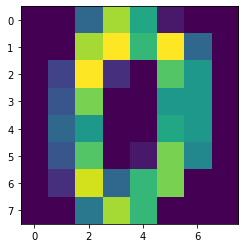

In [103]:
plt.imshow(digits['images'][0])

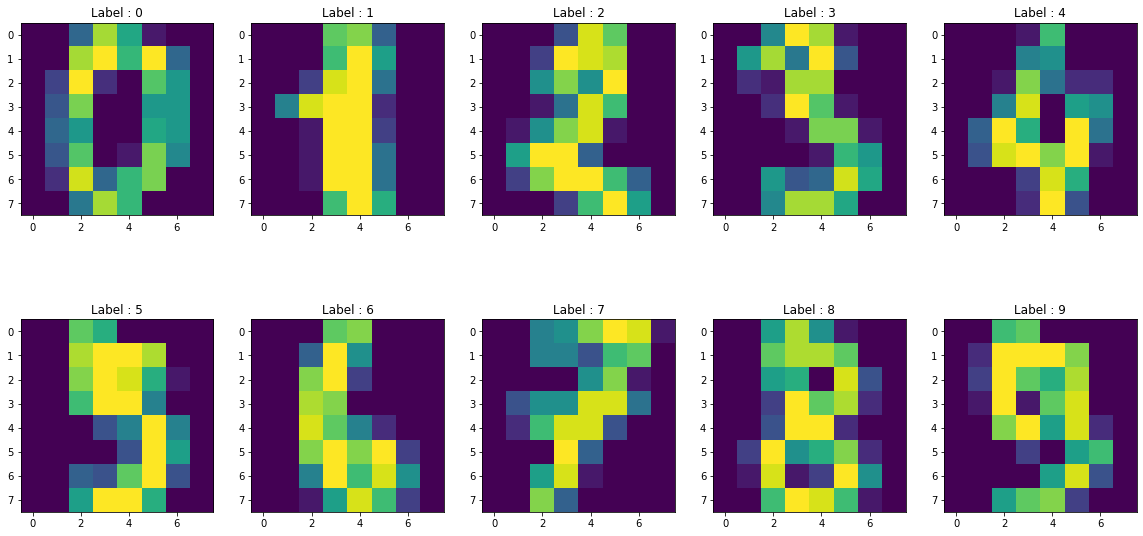

In [104]:
# 숫자 0~9
plt.figure(figsize=(20, 10))
for index, image in enumerate(digits['images'][:10]):
    plt.subplot(2, 5, index+1)
    plt.imshow(image)
    plt.title(f'Label : {digits.target[index]}')
plt.show()

In [105]:
x_train, x_test, y_train, y_test = train_test_split(digits['data'],
                                                    digits['target'],
                                                    stratify=digits['target'],
                                                    random_state=0)

model = LogisticRegression(max_iter=10000).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.9644444444444444)

In [106]:
model.predict(x_test)[:2]

array([2, 0])

In [107]:
model.predict_proba(x_test)[:2]

array([[1.65365518e-02, 1.34561669e-10, 8.20759564e-01, 1.62695836e-01,
        8.47115842e-13, 1.13730761e-09, 2.17734281e-09, 7.79994270e-06,
        1.43463501e-09, 2.44019489e-07],
       [9.99978997e-01, 1.10038401e-15, 1.53895584e-11, 7.96021869e-14,
        1.92498248e-11, 2.20958381e-07, 2.05403400e-05, 8.70036135e-11,
        2.31284156e-07, 1.00372360e-08]])

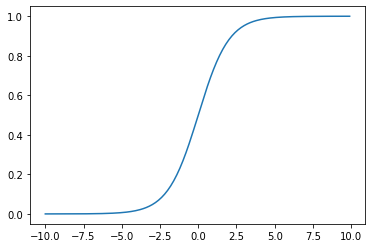

In [108]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x_range = np.arange(-10.0, 10.0, 0.1)
y_range = [sigmoid(x) for x in x_range]
plt.plot(x_range, y_range)

# Task 진행

In [109]:
# 데이터 세트 준비
from sklearn.datasets import load_linnerud


# 데이터 분할


# 모델 평가 ( 가장 좋은 Regression 모델을 찾아보세요.)

